In [1]:
# 연습문제 8-4-1
# Import required libraries
import pandas as pd
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

In [2]:
# 연습문제 8-4-1
df = pd.read_csv('C:/gskim/P4DS/data/ex84.csv')
X = pd.DataFrame(df, columns=['x1','x2','x3','x4','x5','x6']) # name열 불러오기
print(X.head()) # 결과 확인하기 

   x1  x2  x3  x4  x5  x6
0   6   4   7   6   5   4
1   5   7   5   6   6   6
2   5   3   4   5   6   4
3   3   3   2   3   4   3
4   4   3   3   3   2   2


In [3]:
# 연습문제 8-4-1
factor = FactorAnalysis(n_components=2).fit(X)
pd.DataFrame(factor.components_)

,0,1,2,3,4,5
0,-1.104222,-0.793015,-0.587076,-0.805352,-0.724169,-1.350185
1,1.356798,-0.545341,0.915803,-0.247520,0.903791,-0.290881


In [4]:
# 연습문제 8-4-1, 방법2
# Import required libraries
import pandas as pd
import seaborn as sns
import xlrd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
df = pd.read_csv('C:/gskim/P4DS/data/ex84.csv')
df = df[["x1", "x2","x3","x4", "x5","x6"]]
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype='object')

In [66]:
# 연습문제 8-4-1, 방법2
# Dropping missing values rows
df.dropna(inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      25 non-null     int64
 1   x2      25 non-null     int64
 2   x3      25 non-null     int64
 3   x4      25 non-null     int64
 4   x5      25 non-null     int64
 5   x6      25 non-null     int64
dtypes: int64(6)
memory usage: 1.4 KB


,x1,x2,x3,x4,x5,x6
0,6,4,7,6,5,4
1,5,7,5,6,6,6
2,5,3,4,5,6,4
3,3,3,2,3,4,3
4,4,3,3,3,2,2


In [5]:
# 연습문제 8-4-1, 방법2
# Bartlett’s Test and Kaiser-Meyer-Olkin Test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(69.58424852594528, 2.169880205973837e-09)

In [6]:
# 연습문제 8-4-1, 방법2
# Kaiser-Meyer-Olkin (KMO) Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.48248265790619144

In [7]:
# 연습문제 8-4-1, 방법2
# Check Eigenvalues
fa = FactorAnalyzer(rotation=None, n_factors=len(df.columns))
fa.fit(df)
ev, v = fa.get_eigenvalues()
ev

array([2.85453005, 1.54345088, 0.74810884, 0.40898198, 0.3411825 ,
       0.10374575])

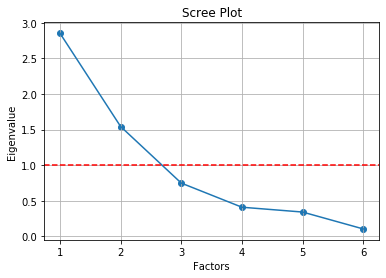

In [8]:
# 연습문제 8-4-1, 방법2
# Create scree plot using matplotlib, 
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

In [9]:
# 연습문제 8-4-1, 방법2
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation='varimax', n_factors=2)
fa.fit(df)
fa_lo = fa.loadings_
print(fa_lo)

[[ 0.92857314  0.14401222]
 [-0.00458102  0.59034844]
 [ 0.64264481  0.12644127]
 [ 0.19228187  0.67240817]
 [ 0.74176889  0.12159229]
 [ 0.25381254  0.9804782 ]]


In [10]:
# 연습문제 8-4-1, 방법2
# Create two factors
fa.get_communalities()
import numpy as np
fa_df = pd.DataFrame(fa_lo)
X_fa = np.dot(df, fa_df)
X_fa
X_fa_df = pd.DataFrame(X_fa)
X_fa_df.columns=['의료품질','병원 이미지 품질']
X_fa_df.head()
ds_fa = pd.concat([df, X_fa_df], axis=1)
ds_fa.head()

,x1,x2,x3,x4,x5,x6,의료품질,병원 이미지 품질
0,6,4,7,6,5,4,15.929414,12.674879
1,5,7,5,6,6,6,14.951202,16.131579
2,5,3,4,5,6,4,13.626975,11.010379
3,3,3,2,3,4,3,8.362625,7.900993
4,4,3,3,3,2,2,8.196492,6.947784


In [11]:
# 연습문제 8-4-2
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
X_ = StandardScaler().fit_transform(X)

In [12]:
# 연습문제 8-4-2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X_)
pd.DataFrame(pca.components_)

,0,1,2,3,4,5
0,-0.453928,-0.285602,-0.395002,-0.401910,-0.415244,-0.471587
1,-0.397008,0.515171,-0.346495,0.372994,-0.401346,0.395881


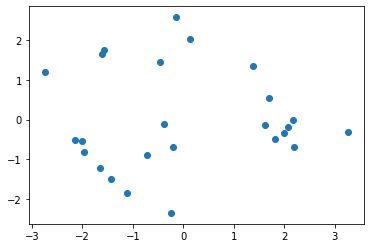

In [13]:
# 연습문제 8-4-2
import matplotlib.pyplot as plt
plt.scatter(pc[:,0],pc[:,1])

False
0
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
y     0
dtype: int64
[[ 0.92857314  0.14401222]
 [-0.00458102  0.59034844]
 [ 0.64264481  0.12644127]
 [ 0.19228187  0.67240817]
 [ 0.74176889  0.12159229]
 [ 0.25381254  0.9804782 ]]
                            OLS Regression Results                            
Dep. Variable:                  y_use   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     4.658
Date:                Fri, 28 Aug 2020   Prob (F-statistic):             0.0206
Time:                        14:53:56   Log-Likelihood:                -28.270
No. Observations:                  25   AIC:                             62.54
Df Residuals:                      22   BIC:                             66.20
Df Model:                           2                                         
Covariance Type:            nonrobust            

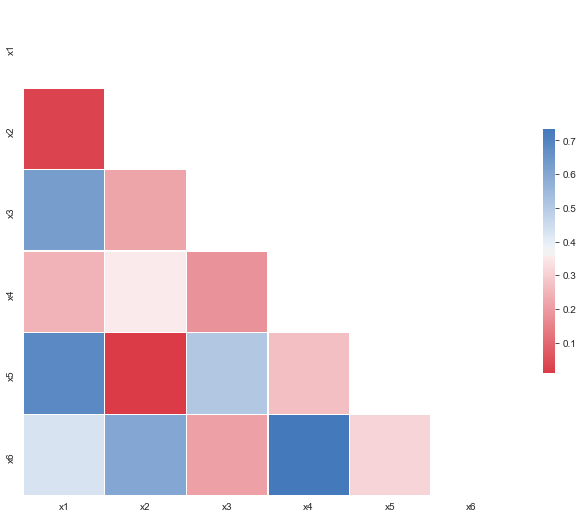

In [14]:
# 연습문제 8-4-3
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
df = pd.read_csv('C:/gskim/P4DS/data/ex843.csv')
df.columns
df
df.describe()
#Some basic statistics of the numerical variables in the dataset.
df.shape
# Missing values1
print(df.isnull().values.any())
# Missing values2
print(df.isnull().sum().sum())
# Replace missing value
print(df.isnull().sum())
# Compute correlations
corr = X.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
X = df[["x1", "x2","x3","x4", "x5","x6"]]
y_use = df["y"]
fa = FactorAnalyzer(rotation='varimax', n_factors=2)
fa.fit(X)
fa_lo = fa.loadings_
print(fa_lo)
fa.get_communalities()
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
kmo_model
import numpy as np
fa_df = pd.DataFrame(fa_lo)
X_fa = np.dot(X, fa_df)
X_fa
X_fa_df = pd.DataFrame(X_fa)
X_fa_df.columns=['의료품질','병원이미지품질']
X_fa_df.head()
ds_fa = pd.concat([df, X_fa_df], axis=1)
ds_fa.head()
import statsmodels.formula.api as sm
result = sm.ols(formula='y_use ~ 의료품질 + 병원이미지품질', data=ds_fa).fit()
print(result.summary())